<a href="https://colab.research.google.com/github/titilomt/data_science_puc_projects/blob/master/puc_python_for_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/titilomt/data_science_puc_projects/blob/master/figures/dogecoin.png?raw=1">

*Notebook criado por **Tiago Henrique Pereira Fonseca** - para a diciplina de Programação para Ciência de dados - Pós Graduação PUC Minas*

*O trabalho deve ser feito de maneira descritiva, apresentando a documentação do caminho trilhado para chegar as analises.*

# Ferramentas Usadas:
- Jupyter Lab 
- Pandas
- matplotlib

# Base de CSV
- https://www.kaggle.com/psparks/instacart-market-basket-analysis

# Inicialização de modulos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.close('all')

## CSV
Os arquivos CSV são compostos por:
- aisles.csv (path='csv/aisles.csv')
- departments.csv (path='csv/departments.csv')
- orders.csv (path='csv/orders.csv')
- products.csv (path='csv/products.csv')
- order_products_prior.csv (path='csv/order_products_prior.csv')
- order_products_train.csv (path='csv/order_products_train.csv')

# AISLES

Representa os corredores de nossa rede de supermercados
## Campos
- aisle_id [identificador unico de AISLES]
- aisle [propriedade que modela seu AISLE ex: "tea"]

In [ ]:
aisles = pd.read_csv('../content/aisles.csv')
aisles.columns = ['id', 'corredores']
aisles.head()

,id,corredores
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


Entidade Aisles não possui ligações com outras entidades, podendo ser uma entidade "filha" que cede a uma entidade "pai" seu "id".

# DEPARTMENTS
Entidade que representa os departamentos dentro de nosso supermercado
## Campos
- department_id [identificador do departamento]
- department [nome do departamento ex: "frozen"]

In [ ]:
departments = pd.read_csv('../content/departments.csv')
departments.columns = ['id', 'departamento']
departments.head()

,id,departamento
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Entidade DEPARTMENTS não possui ligações com outras entidades, podendo ser uma entidade "filha" de uma Entidade com mais propriedades. 

# ORDERS
Entidade ORDERS representa os pedidos feitos em nosso supermercado
## Campos
- order_id [identificador do pedido]
- user_id [identificador do consumidor]
- eval_set [avaliações do pedido]
- order_number [número do pedido]
- order_dow
- order_hour_of_day [hora do dia que foi feito o pedido]
- days_since_prior_order [dias desde que o pedido previo foi feito]

In [12]:
orders = pd.read_csv('../content/orders.csv')
orders.columns = ['id', 'user_id', 'avaliacoes', 'numero_pedido', 'order_dow', 'hora_pedido_dia', 'dias_desde_pedido_previo']
orders.head()

,id,user_id,avaliacoes,numero_pedido,order_dow,hora_pedido_dia,dias_desde_pedido_previo
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
'''
Aqui podemos fazer agrupamentos para extrair informações! 
Por exemplo: 
    "Qual a média de número de pedido, 
    hora que o pedido foi feito, 
    dias desde que o pedido previo foi realizados,
    de acordo com cada avaliação?"
'''
orders.groupby('avaliacoes').mean()[['numero_pedido', 'hora_pedido_dia', 'dias_desde_pedido_previo']]

,numero_pedido,hora_pedido_dia,dias_desde_pedido_previo
avaliacoes,,,
prior,17.191066,13.443466,10.707242
test,16.566627,13.592200,17.082640
train,16.603937,13.581363,17.049859


In [ ]:
'''
Podemos também tirar a porcentagem de um valor dentro de uma coluna
Aplicado a seguinte formula: [(qtde_value/qtde_total)*100]
(orders['avaliacoes'].value_counts(normalize=True).mul(100)/orders['avaliacoes'].count())*100
'''
avaliacoes = orders['avaliacoes']
df_avaliacoes = pd.concat([avaliacoes.value_counts(),              
avaliacoes.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))
df_avaliacoes['percentage'] = pd.Series([round(val, 2) for val in df_avaliacoes['percentage']], index = df_avaliacoes.index)
df_avaliacoes.head()

,counts,percentage
prior,3214874,93.97
train,131209,3.84
test,75000,2.19


In [ ]:
'''
Podemos responder perguntas como: 
Qual a hora do dia que temos mais pedidos feitos?
'''
hora_dia_pedido = orders['hora_pedido_dia']
df_hora_dia_pedido = pd.concat([hora_dia_pedido.value_counts(),              
hora_dia_pedido.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))
df_hora_dia_pedido['percentage'] = pd.Series([round(val, 2) for val in df_hora_dia_pedido['percentage']], index = df_hora_dia_pedido.index)
df_hora_dia_pedido.head()

,counts,percentage
10,288418,8.43
11,284728,8.32
15,283639,8.29
14,283042,8.27
13,277999,8.13


In [ ]:
'''
Qual foi o maior atraso que tivemos desde que o pedido foi feito
'''
dias_desde_pedido_previo = orders['dias_desde_pedido_previo']
dias_desde_pedido_previo.max()

30.0

Entidade ORDERS não possui propriedades que se agrupam com outras entidades. Porém tiramos algumas conclusões sobre a Entidade com relação a ela mesma.

# PRODUCTS
Relacionamento que trata dos produtos de nosso supermercado
## Campos
- product_id [identificador do produto]
- product_name [nome do produto]
- aisle_id [identificador do corredor]
- department_id [identificador do departamento]

In [11]:
products = pd.read_csv('../content/products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
'''
Entidade Products possui relacoes com AISLES e DEPARTMENTS
podemos usar a função merge para unir as entidades com a sua 
chave de indentificação
'''
merged_prod = products.merge(aisles, left_on='aisle_id', right_on='id')
merged_prod.head()

,product_id,product_name,aisle_id,department_id,id,corredores
0,1,Chocolate Sandwich Cookies,61,19,61,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,61,cookies cakes
2,102,Danish Butter Cookies,61,19,61,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,61,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,61,cookies cakes


In [ ]:
'''
Com o resultado deste merge podemos cruzar informações de uma
Entidade com outra, ex:
"Quantos produtos existem por categoria(corredor)? [pegando apenas os top 5]"
'''
gby = merged_prod.groupby('corredores')[['product_id']].count().rename(columns={'product_id': 'count'})
res = gby.apply(lambda x: x.sort_values(ascending=False))
res.head()

,count
corredores,
missing,1258
candy chocolate,1246
ice cream ice,1091
vitamins supplements,1038
yogurt,1026


In [ ]:
'''
Podemos fazer um merge com o departamento 
e assim obter um cruzamento de dados com o merge de products x corredores
'''
products_aisles_dep = merged_prod.merge(departments, left_on='department_id', right_on='id')
products_aisles_dep.head()

,product_id,product_name,aisle_id,department_id,id_x,corredores,id_y,departamento
0,1,Chocolate Sandwich Cookies,61,19,61,cookies cakes,19,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,61,cookies cakes,19,snacks
2,102,Danish Butter Cookies,61,19,61,cookies cakes,19,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,61,cookies cakes,19,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,61,cookies cakes,19,snacks


In [ ]:
'''
Com este cruzamento podemos responder peguntas do tipo:
"Qual a porcentagem de itens por departamento? [top 5]"
'''
gb_dep = products_aisles_dep.groupby(['department_id', 'departamento']).agg({'product_id': 'count'})
total_prod = gb_dep['product_id'].sum()
dep_prod_perc = gb_dep.groupby(level=0).apply(lambda x: round((x*100/total_prod), 2))
dep_prod_srt = dep_prod_perc.sort_values(by='product_id', ascending=False).rename(columns={'product_id': 'Percent'})
dep_prod_srt.head()

,,Percent
department_id,departamento,
11,personal care,13.21
19,snacks,12.61
13,pantry,10.81
7,beverages,8.78
1,frozen,8.06


In [ ]:
"""
Podemos cruzar dados das três entidades, PRODUCTS x DEPARTMENTS x AISLES
para descobrirmos por exemplo: 
"Quantos produtos temos por corredor e quais são seus departamentos?" 
"""
products_aisles_dep.groupby(['aisle_id', 'corredores', 'departamento']).agg({'product_id': 'count'}).sort_values(by='product_id', ascending=False).head(aisles.size).rename(columns={'product_id': 'Counts'})



,,,Counts
aisle_id,corredores,departamento,
100,missing,missing,1258
45,candy chocolate,snacks,1246
37,ice cream ice,frozen,1091
47,vitamins supplements,personal care,1038
120,yogurt,dairy eggs,1026
...,...,...,...
113,frozen juice,frozen,47
82,baby accessories,babies,44
32,packaged produce,produce,32


# ORDER_PRODUCTS_PRIOR
Entidade que representa a união entre as entidades ORDER e PRODUCTS
## Colunas
- order_id [identificador do pedido]
- product_id [identificador do produto]
- add_to_cart_order [número de fila que produto foi inserido]
- reordered [flag se foi reordenado]

In [9]:
ord_prod_prior = pd.read_csv('../content/order_products_prior.csv')
ord_prod_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120.0,1.0,1.0
1,2,28985.0,2.0,1.0
2,2,9327.0,3.0,0.0
3,2,45918.0,4.0,1.0
4,2,30035.0,5.0,0.0


Text(0.5, 0, 'Identificador do Pedido')

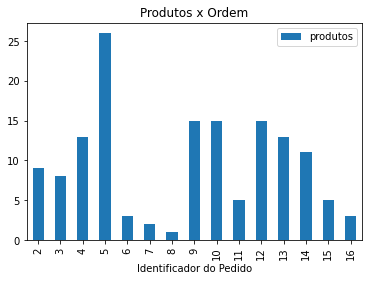

In [25]:
"""
Merge com Entidades relacionadas (Aqui poderiamos ir mais alem pois products tem relacionamento com outras tabelas!)
"""
ord_prod_merge = ord_prod_prior.merge(products, left_on='product_id', right_on='product_id').merge(orders, left_on="order_id", right_on="id")
ord_prod_merge.head()
"""
Podemos extrair gráficos de número de produtos por pedido e plotar isto em grafico usando a
biblioteca matplot
"""
df_ord_prod = ord_prod_merge.groupby('order_id').count()[['product_id']].rename(columns={'product_id': 'produtos'})
ax = df_ord_prod.head(15).plot(kind='bar',title='Produtos x Ordem')
ax.set_xlabel("Identificador do Pedido")

# ORDER_PRODUCTS_TRAIN
Entidade responsável por modelar relacionamento entre order, products do tipo TRAIN 
## Colunas
- order_id [identificador do pedido]
- product_id [identificador do produto]
- add_to_cart_order [posicão que foi adicionado no carrinho]
- reordered [flag se foi realocado]

In [28]:
ord_prod_train = pd.read_csv('../content/order_products_train.csv')
ord_prod_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


Text(0.5, 0, 'Identificador do pedido')

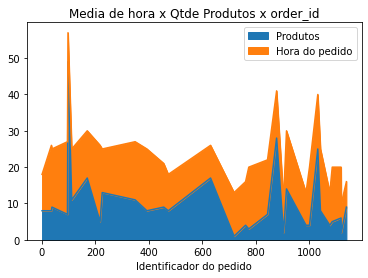

In [39]:
"""
Podemos fazer o merge desta entidade com ORDERS e PRODUCTS
para obtermos cruzamentos de dados entre estas tabelas
"""
plt.close('all')
train_merge = ord_prod_train.merge(products, left_on='product_id', right_on='product_id').merge(orders, left_on="order_id", right_on="id")

train_gb = train_merge[['order_id', 'product_id', 'hora_pedido_dia']].groupby(['order_id']).agg({'product_id': 'count', 'hora_pedido_dia': 'mean'})

ax = train_gb.head(30).rename(columns={'product_id': 'Produtos', 'hora_pedido_dia': 'Hora do pedido'}).plot.area(title='Media de hora x Qtde Produtos x order_id')
ax.set_xlabel('Identificador do pedido')